In [278]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
from mpl_toolkits.mplot3d import Axes3D
import prince


In [279]:
dataset = pd.read_excel("../Projekty/Studenci/Analysis-of-student/dataset.xlsx")

<h2>About</h2>

Analysis of the correspondence between the place of living of students and their level of activity:

<u>Place of living:</u>
<li>1 - Country</li>
<li>2 - Small town</li>
<li>3 - Medium city</li>
<li>4 - Big city</li> <br>

<u>Physical activity:</u>
<li>0 - no physical activity</li>
<li>1 - once a week</li>
<li>2 - twice a week</li>
<li>3 - thee times a week</li>
<li>4 - more than three times a week<br></li>

As we dispose a relatively small amount of data, authors decided to reduce amount of levels of physical activity to:
<li>0 - no physical activity</li>
<li>1 - once or twice a week</li>
<li>2 - more than twice a week</li>

In [280]:
# Place of living - M3

dataset['M3'].map({1:'Country', 2:'Small town', 3:'Medium city', 4:'Big city'}).value_counts()

Medium city    37
Big city       16
Country         7
Name: M3, dtype: int64

In [281]:
# Physical activity - pyt_15

#reducing the scope for analysis 
dataset['pyt_15'] = dataset['pyt_15'].replace({0: 0, 1: 1, 2: 1, 3: 2, 4: 2})

In [282]:
dataset['pyt_15'].map({0:'no physical activity', 1:'once or twice a week', 2:'more than twice a week'}).value_counts()

more than twice a week    26
once or twice a week      26
no physical activity       8
Name: pyt_15, dtype: int64

<h2> Contingency matrix and chart </h2>

In [283]:
# Converting numeric values to text (for purposes of labels)
dataset_cat = dataset.reset_index(drop=True)

dataset_cat['M3'] = dataset['M3'].replace({1: "Country", 3: "Medium city", 4: "Big city"})
dataset_cat['pyt_15'] = dataset['pyt_15'].replace({0: "No physical activity", 1: "Once-twice a week", 2: "More than twice a week"})

In [284]:
dataset_cat['pyt_15'].head() #checking

0    More than twice a week
1         Once-twice a week
2    More than twice a week
3         Once-twice a week
4    More than twice a week
Name: pyt_15, dtype: object

In [285]:
dataset_cat['M3'].head() #checking

0    Medium city
1    Medium city
2       Big city
3    Medium city
4    Medium city
Name: M3, dtype: object

In [286]:
# Creating a contingency table with specific arrangement (for purpose of chart clarity)
contingency_matrix = pd.crosstab(dataset_cat['M3'], dataset_cat['pyt_15'])
contingency_matrix

pyt_15,More than twice a week,No physical activity,Once-twice a week
M3,,,
Big city,8,2,6
Country,2,1,4
Medium city,16,5,16


In [287]:
contingency_matrix.index #checking

Index(['Big city', 'Country', 'Medium city'], dtype='object', name='M3')

In [288]:
contingency_matrix.columns #checking

Index(['More than twice a week', 'No physical activity', 'Once-twice a week'], dtype='object', name='pyt_15')

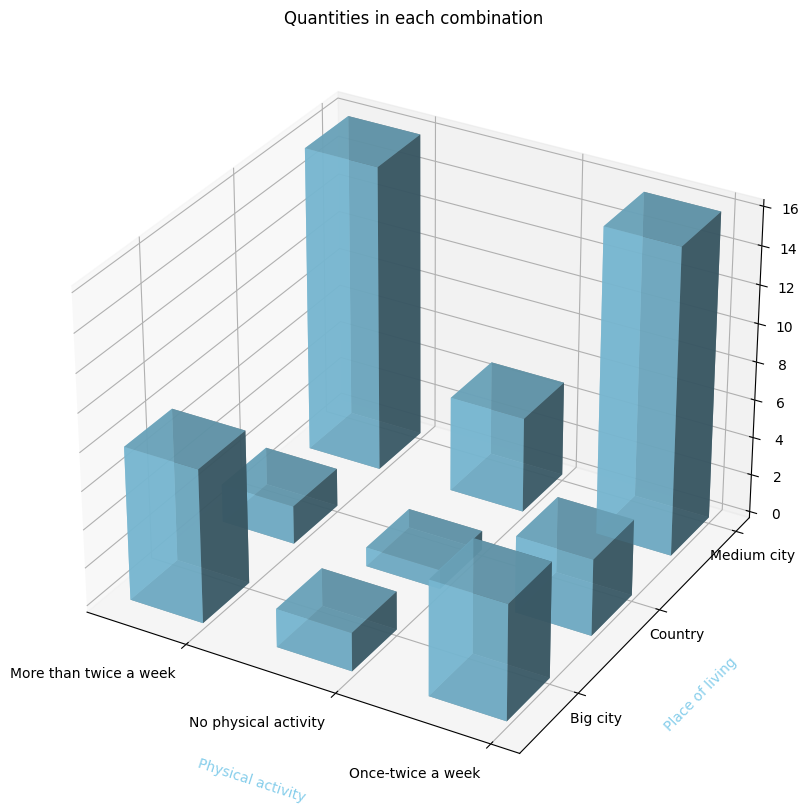

In [289]:
# Creating a 3D chart
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

xpos, ypos = np.meshgrid(range(contingency_matrix.shape[0]), range(contingency_matrix.shape[1]))
xpos = xpos.flatten()   
ypos = ypos.flatten()
zpos = np.zeros_like(xpos)

dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = contingency_matrix.values.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='skyblue', alpha=0.8)


ax.set_xticks(np.arange(len(contingency_matrix.columns))+ 0.5)
ax.set_yticks(np.arange(len(contingency_matrix.index))+ 0.5)
ax.set_xticklabels(contingency_matrix.columns, fontdict={'ha':'right'})
ax.set_yticklabels(contingency_matrix.index, fontdict={'va':'top'})
ax.set_xlabel('Physical activity', labelpad=30)
ax.xaxis.label.set_color('skyblue')
ax.set_ylabel('Place of living', labelpad=20)
ax.yaxis.label.set_color('skyblue')
ax.set_title('Quantities in each combination')

plt.show()

The largest number of the University of Economics students are from medium-sized cities and engage in physical activity more than twice a week (16). The same number of students are from medium-sized cities and engage in physical activity once or twice a week. The fewest UE students who do not engage in physical activity are from rural areas. There were no students from small towns.

<h2>Independence of variables</h2>

<h4 style='color:blue';>Test: Pearson’s Chi-Square Test</h4>
Hypotheses:
<li>H0: variables are independent</li>
<li>H1: variables are not independent</li>
<br>

In [290]:
stat, p, dof, expected = chi2_contingency(contingency_matrix)
p

0.9152119504018102

Since the p-value is more 0.05 for the χ (chi-squared) test, the  <b>H0 holds true</b>. The place of residence of UE students and their frequency of physical activity <u>do not show a significant relationship </u>.

In [291]:
#checking the difference between real and expected value
round(expected-contingency_matrix) 

pyt_15,More than twice a week,No physical activity,Once-twice a week
M3,,,
Big city,-1.0,0.0,1.0
Country,1.0,-0.0,-1.0
Medium city,0.0,-0.0,0.0


<h2> Proper correspondence analysis </h2>

In [292]:
#creating contingency matrix for calculations
contingency_matrix_num = pd.crosstab(dataset['pyt_15'], dataset['M3'])
contingency_matrix_num

M3,1,3,4
pyt_15,,,
0,1,5,2
1,4,16,6
2,2,16,8


In [293]:
# conducting analysis of correspondence
ca = prince.CA(n_components=2)
ca.fit(contingency_matrix_num)

In [294]:
# getting columns coordinates
column_coordinates = ca.column_coordinates(contingency_matrix_num)

# getting rows coordinates
row_coordinates = ca.row_coordinates(contingency_matrix_num)

In [295]:
column_coordinates

,0,1
M3,,
1,-0.308063,-0.008569
3,-0.000628,0.005263
4,0.136231,-0.008422


In [296]:
row_coordinates

,0,1
pyt_15,,
0,-0.038261,0.016899
1,-0.129118,-0.003450
2,0.140891,-0.001750


<h3> Creating a chart for results </h3>

In [297]:
#changing type to list to use in chart above
column_coordinates_plot = column_coordinates.values.tolist()
row_coordinates_plot = row_coordinates.values.tolist()

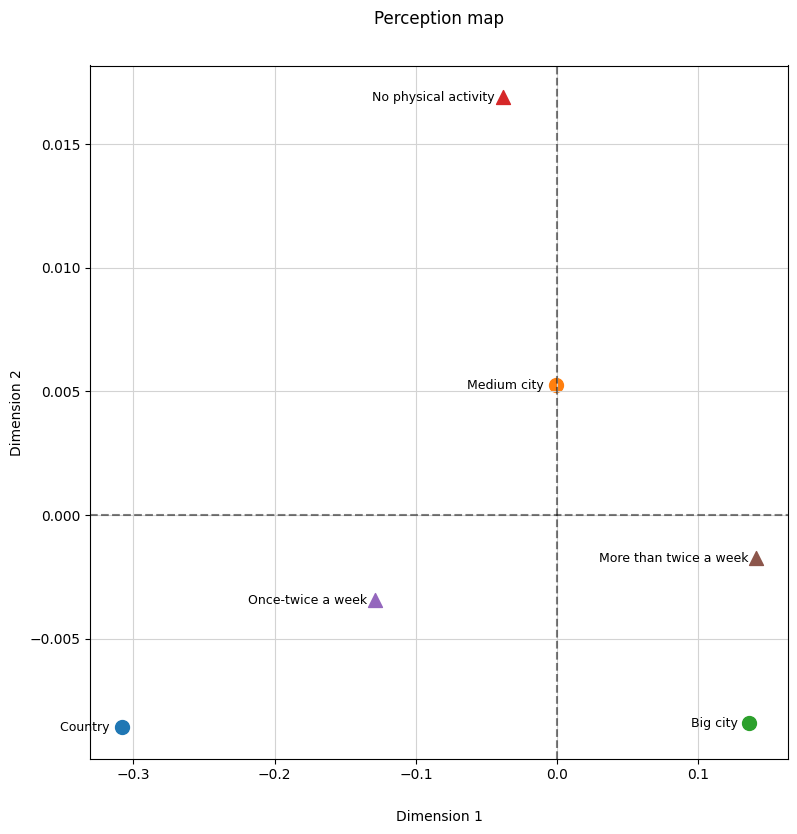

In [298]:
# labels
column_labels = {1: "Country   ", 2: "Medium city   ", 3: "Big city   "}
rows_labels = {0: "No physical activity  ", 1: "Once-twice a week  ", 2: "More than twice a week  "}

# creating chart
fig, ax = plt.subplots(figsize=(9,9))

# adding points to columns
for i, coord in enumerate(column_coordinates_plot):
    ax.scatter(coord[0], coord[1], s=100, label=column_labels[i+1])

# adding points to rows
for i, coord in enumerate(row_coordinates_plot):
    ax.scatter(coord[0], coord[1], s=100, marker='^', label=rows_labels[i])

# adding lables for points
for i, coord in enumerate(column_coordinates_plot):
    ax.text(coord[0], coord[1], column_labels[i+1], ha='right', va='center', fontsize=9)

for i, coord in enumerate(row_coordinates_plot):
    ax.text(coord[0], coord[1], rows_labels[i], ha='right', va='center', fontsize=9)

# adding auxiliary lines (0,0)
ax.axhline(y=0, color='k', linestyle='--', alpha=0.5)
ax.axvline(x=0, color='k', linestyle='--', alpha=0.5)

ax.set_xlabel('Dimension 1', labelpad=20)
ax.set_ylabel('Dimension 2')
ax.set_title('Perception map', pad=30)
ax.grid(color='lightgrey')

plt.show()


The coordinate axes determine the average profiles. The further an object is from the center of the coordinate system, the more it differs from the average profile.

<h3> Conclusions </h3>
Rural areas correspond to the response "once or twice a week", meaning that people living in rural areas mostly indicated that they engage in physical activity once or twice a week. Large cities correspond to the response "more than twice a week", so people living in large cities usually indicated that they engage in physical activity more than twice a week. Medium-sized cities most closely correspond to the response "do not engage in physical activity", but it should be noted that this response is far from the center of the coordinate system.

The most distant category from the average profile, based on place of residence, is rural areas. In the case of physical activity, the most distant category from the average profile is the response "do not engage in physical activity".